In [19]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
!ls prediction

labels.csv      predictions.csv


In [3]:
pd.read_csv('prediction/predictions.csv').head()

,prediction_email,prediction_resume,prediction_scientific publication,image_path
0,1.039710e-06,9.795218e-05,0.999901,LG_test/doc_000584.png
1,2.351575e-04,1.206579e-01,0.879107,LG_test/doc_000551.png
2,1.843045e-07,8.074077e-07,0.999999,LG_test/doc_000089.png
3,2.386619e-05,1.224379e-01,0.877538,LG_test/doc_000281.png
4,1.126910e-06,2.974345e-05,0.999969,LG_test/doc_000509.png


In [4]:
df_res = pd.read_csv('prediction/labels.csv')
print(df_res.shape)
df_res.head()

(30, 2)


,label,image_path
0,scientific publication,LG_test/doc_000584.png
1,scientific publication,LG_test/doc_000551.png
2,scientific publication,LG_test/doc_000089.png
3,scientific publication,LG_test/doc_000281.png
4,scientific publication,LG_test/doc_000509.png


In [5]:
!ls ../tmp/DAI_document_classification_TEST

data.csv images


In [6]:
df_act = pd.read_csv('../tmp/DAI_document_classification_TEST/data.csv')
print(df_act.shape)
df_act.head()

(30, 2)


,image,class
0,images/doc_000832.png,scientific_publication
1,images/doc_000076.png,email
2,images/doc_000584.png,scientific_publication
3,images/doc_000101.png,resume
4,images/doc_000279.png,email


In [7]:
df_res['key'] = [s.split('/')[1] for s in df_res['image_path']]
df_act['key'] = [s.split('/')[1] for s in df_act['image']]

In [30]:
df = pd.merge(df_act, df_res, on='key')
df = df[['key','class','label']]
df = df.rename(columns={'class':'actual', 'label':'predict'})
df = df.replace({'scientific publication':'scientific_publication'}) # Zero shotのラベル設定で、'scientific publication'としていた
df

,key,actual,predict
0,doc_000832.png,scientific_publication,scientific_publication
1,doc_000076.png,email,email
2,doc_000584.png,scientific_publication,scientific_publication
3,doc_000101.png,resume,scientific_publication
4,doc_000279.png,email,email
5,doc_000248.png,resume,scientific_publication
6,doc_000802.png,resume,scientific_publication
7,doc_000089.png,scientific_publication,scientific_publication
8,doc_000097.png,resume,scientific_publication
9,doc_000509.png,scientific_publication,scientific_publication


In [31]:
df['actual'].value_counts()

scientific_publication    10
email                     10
resume                    10
Name: actual, dtype: int64

In [32]:
df['predict'].value_counts()

scientific_publication    24
email                      4
resume                     2
Name: predict, dtype: int64

In [33]:
labels = sorted(set(df['actual']))
cm = confusion_matrix(df['actual'].to_list(), df['predict'].to_list(), labels=labels)
cm

array([[ 4,  1,  5],
       [ 0,  1,  9],
       [ 0,  0, 10]])

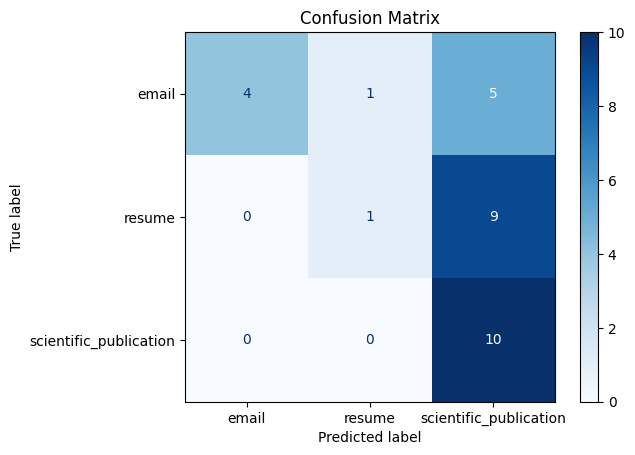

In [34]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)  # 色設定（オプション）
plt.title("Confusion Matrix")
plt.show()